In [1]:
from sklearn.metrics import confusion_matrix
import xarray as xr
%pylab inline

/home/rjackson/.conda/envs/pydda_env/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
thresholds = [1, 3, 5, 10, 20]

In [3]:
exp_files = {}
for i in thresholds:
    exp_files['snr%d' % i] = '/lcrc/group/earthscience/rjackson/arming_the_edge/scripts/classifications/classification_trainsnrgt%d.000000.nc' % i

for i in range(4):
    num1 = thresholds[i]
    num2 = thresholds[i + 1]
    exp_files['snr%d_%d' % (num1, num2)] = '/lcrc/group/earthscience/rjackson/arming_the_edge/scripts/classifications/classification_trainsnrgt%d.000000snrgt%d.000000.nc' % (num1, num2)
     
for i in range(3):
    num1 = thresholds[i]
    num2 = thresholds[i + 1]
    num3 = thresholds[i + 2]
    exp_files['snr%d_%d_%d' % (num1, num2, num3)] = '/lcrc/group/earthscience/rjackson/arming_the_edge/scripts/classifications/classification_trainsnrgt%d.000000snrgt%d.000000snrgt%d.000000.nc' % (num1, num2, num3)
    num1 = thresholds[i]
    num2 = thresholds[i + 2]
    exp_files['snr%d_%d' % (num1, num2)] = '/lcrc/group/earthscience/rjackson/arming_the_edge/scripts/classifications/classification_trainsnrgt%d.000000snrgt%d.000000.nc' % (num1, num2)
  
for i in range(2):
    num1 = thresholds[i]
    num2 = thresholds[i + 1]
    num3 = thresholds[i + 2]
    num4 = thresholds[i + 3]
    exp_files['snr%d_%d_%d_%d' % (num1, num2, num3, num4)] = '/lcrc/group/earthscience/rjackson/arming_the_edge/scripts/classifications/classification_trainsnrgt%d.000000snrgt%d.000000snrgt%d.000000snrgt%d.000000.nc' % (num1, num2, num3, num4)
exp_files['snr1_3_5_10_20'] = '/lcrc/group/earthscience/rjackson/arming_the_edge/scripts/classifications/classification_trainsnrgt1.000000snrgt3.000000snrgt5.000000snrgt10.000000snrgt20.000000.nc'

In [4]:
exp_files = {'snr1': '/lcrc/group/earthscience/rjackson/arming_the_edge/scripts/classifications/classification_trainsnrgt1.000000.nc',
             'snr1_3': '/lcrc/group/earthscience/rjackson/arming_the_edge/scripts/classifications/classification_trainsnrgt1.000000snrgt3.000000.nc',
             'snr1_3_5': '/lcrc/group/earthscience/rjackson/arming_the_edge/scripts/classifications/classification_trainsnrgt1.000000snrgt3.000000snrgt5.000000.nc',
             'snr1_3_5_10': '/lcrc/group/earthscience/rjackson/arming_the_edge/scripts/classifications/classification_trainsnrgt1.000000snrgt3.000000snrgt5.000000snrgt10.000000.nc',
             'snr5': '/lcrc/group/earthscience/rjackson/arming_the_edge/scripts/classifications/classification_trainsnrgt5.000000.nc',
             'snr10': '/lcrc/group/earthscience/rjackson/arming_the_edge/scripts/classifications/classification_trainsnrgt10.000000.nc',
             'snr20': '/lcrc/group/earthscience/rjackson/arming_the_edge/scripts/classifications/classification_trainsnrgt20.000000.nc',
             'snr3_5': '/lcrc/group/earthscience/rjackson/arming_the_edge/scripts/classifications/classification_trainsnrgt1.000000snrgt3.000000snrgt5.000000snrgt10.000000.nc',
             'snr3_10': '/lcrc/group/earthscience/rjackson/arming_the_edge/scripts/classifications/classification_trainsnrgt3.000000snrgt10.000000.nc'}
             'snr3_20': '/lcrc/group/earthscience/rjackson/arming_the_edge/scripts/classifications/classification_trainsnrgt3.000000snrgt20.000000.nc'} 
strings = {'snr1': '$P_{>1 \ dB}$',
             'snr1_3': '$P_{>1 \ dB}$, \n $P_{>2 \ dB}$',
             'snr1_3_5': '$P_{>1 \ dB}$, \n $P_{>3 \ dB}$, \n $P_{>5 \ dB}$',
             'snr1_3_5_10': '$P_{>1 \ dB}$, $P_{>3 \ dB}$, \n $P_{>5 \ dB}$, \n $P_{>10 \ dB}$',
             'snr5': '$P_{>5 \ dB}$',
             'snr10': '$P_{>10 \ dB}$',
             'snr3_5': '$P_{>3 \ dB}$, \n $P_{>5 \ dB}$',
             'snr3_10': '$P_{>3 \ dB}$, \n $P_{>10 \ dB}$'}

In [5]:
ds = xr.open_dataset(exp_files['snr3_5'])
ds

/home/rjackson/.conda/envs/pydda_env/lib/python3.9/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:           (label_true: 24228, label_pred: 24228,
                       label_train_pred: 19382, label_test_pred: 4846,
                       label_train: 19382, label_test: 4846)
Coordinates:
  * label_true        (label_true) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 0 1 1 1 1
  * label_pred        (label_pred) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
  * label_train_pred  (label_train_pred) float32 0.0 1.0 0.0 2.0 ... 1.0 2.0 1.0
  * label_test_pred   (label_test_pred) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 1.0
  * label_train       (label_train) int64 0 0 0 2 1 0 2 0 2 ... 0 0 1 0 1 1 1 1
  * label_test        (label_test) int64 0 1 0 1 1 1 0 0 1 ... 1 0 0 0 1 0 0 0 0
Data variables:
    *empty*

In [13]:
positives = {}
positives_true = {}
negatives = {}
negatives_true = {}
true_pred = {}
totals = {}
for k in exp_files.keys():
    ds = xr.open_dataset(exp_files[k])
    positives[k] = ds.label_test_pred.values >= 1
    positives_true[k] = ds.label_test.values >= 1
    negatives[k] = ds.label_test_pred.values == 0
    negatives_true[k] = ds.label_test.values == 0
    totals[k] = len(ds.label_test.values)
    true_pred[k] = np.sum(np.equal(ds.label_test.values, ds.label_test_pred))
    ds.close()

specificity = {}
sensitivity = {}
accuracy = {}
for k in exp_files.keys():
    specificity[k] = np.sum(np.logical_and(positives[k], positives_true[k])) / np.sum(positives_true[k]) * 100
    sensitivity[k] = np.sum(np.logical_and(negatives[k], negatives_true[k])) / np.sum(negatives_true[k]) * 100
    accuracy[k] = 100 * true_pred[k]/totals[k]

In [14]:
print(sensitivity)

{'snr1': 81.90679256777338, 'snr3': 91.96072414851182, 'snr5': 95.13677811550151, 'snr10': 96.13643223664351, 'snr20': 98.05589307411907, 'snr1_3': 90.83533653846155, 'snr3_5': 80.63348416289593, 'snr5_10': 92.85285285285285, 'snr10_20': 98.046875, 'snr1_3_5': 85.65438754118, 'snr1_5': 83.18291215403129, 'snr3_5_10': 86.62576687116564, 'snr3_10': 84.0, 'snr5_10_20': 61.39393939393939, 'snr5_20': 75.6511205330103, 'snr1_3_5_10': 51.4595245260307, 'snr3_5_10_20': 92.188919164396, 'snr1_3_5_10_20': 79.65745192307693}


In [38]:
key = 'snr3_5_10_20'
(accuracy[key].values.round(1), sensitivity[key].round(1), specificity[key].round(1))

(77.4, 92.2, 55.3)

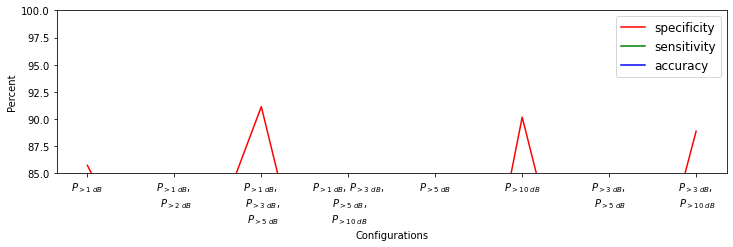

In [6]:
x_labels = [x for x in specificity.keys()]
spec = np.array([x for x in specificity.values()])
sens = np.array([x for x in sensitivity.values()])
accur = np.array([x for x in accuracy.values()])
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
font = {'size'   : 12}

matplotlib.rc('font', **font)
ax.plot(spec, color='r', label='specificity')
ax.plot(sens, color='g', label='sensitivity')
ax.plot(accur, color='b', label='accuracy')
ax.set_xticks(range(len(spec)))
ax.set_xticklabels([x_labels for x_labels in strings.values()])
ax.set_ylim([85, 100])
ax.set_xlabel('Configurations')
ax.set_ylabel('Percent')
ax.legend()
fig.savefig('accuracy_test.png', dpi=300, bbox_inches="tight")

In [5]:
ds

NameError: name 'ds' is not defined

(array([16596.,  6562.,  1070.]), array([-0.5,  0.5,  1.5,  2.5]), <BarContainer object of 3 artists>)


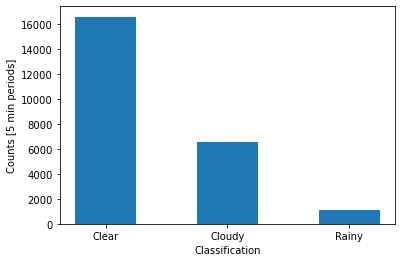

In [7]:
ds = xr.open_dataset(exp_files['snr1_3'])
fig, ax = plt.subplots(1, 1)
n = ax.hist(ds.label_true, bins=np.array([-0.5, 0.5, 1.5, 2.5]), rwidth=0.5)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Clear', 'Cloudy', 'Rainy'])
ax.set_ylabel('Counts [5 min periods]')
ax.set_xlabel('Classification')
fig.savefig('dataset_summary.png', dpi=300)
print(n)

In [10]:
n[0]/n[0].sum()

array([0.73040845, 0.23724056, 0.03235099])

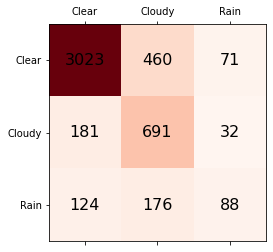

In [8]:
#ds = xr.open_dataset(exp_files['snr3_5'])
label_pred = ds.label_test_pred.values
label_true = ds.label_test.values
matrix = confusion_matrix(label_pred, label_true)
fig, ax = plt.subplots(1, 1)
ax.matshow(matrix, cmap='Reds')
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:d}'.format(z), ha='center', va='center', color='k', fontsize=16)

ax.set_xticks([0, 1, 2])
ax.set_yticks([0, 1, 2])
ax.set_xticklabels(['Clear', 'Cloudy', 'Rain'])
ax.set_yticklabels(['Clear', 'Cloudy', 'Rain'])
fig.savefig('confusion_matrix_gbm.png', dpi=300)